# KNN 

Using the [iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) we used KNN to use the data to predict the flower type

---

## 1. Description

#### a. Description
The data set is taking measurements of different parts of flowers and then giving the flower type.

#### b. Representation
1. The first value is the length of the sepal of the flower in centimeters.
2. The second value is the width of the sepal of the flower in centimeters.
3. The third value is the length of the petals of the flower in centimeters.
4. The fourth value is the width of the petals of the flower in centimeters.
5. The fifth value is the type or class of the flower that the measurements correspond to.

#### c. Target
The target variable that the program is trying to predict is the type or class of the flower given the measurements. 

## 2. Train and Sets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy

#### Reading in the data from the iris data set

In [2]:
names = ["Sepal Width", "Sepal Length", "Petal Width", "Petal Length", "Flower Type"]
irisData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = names)

X = irisData[["Sepal Width", "Sepal Length"]]
Y = irisData["Flower Type"]
X.head()

,Sepal Width,Sepal Length
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Splitting the data up into training and testing sets

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

c:\users\ryank\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((105, 2), (45, 2), (105,), (45,))

## 3. KNN by Hand

In [4]:
import math

def dist(neighbor, testPoint):
    power = pow((neighbor - testPoint), 2)
    dist = math.sqrt(power)
    return dist

In [5]:
import scipy
correctCounter = 0
answers = []
k = 1
while(k < 26):
    for test_index in range(len(X_test)):
        xTestPoint = X_test[test_index]
        yTest = Y_test[test_index]

        storage = []

        for train_index in range(len(X_train)):
            xNeighbor = X_train[train_index]

            yNeighbor = Y_train[train_index]

            distance = dist(xNeighbor, xTestPoint)

            storage.append([distance, yNeighbor])

        sorted(storage)
        closest = storage[:k]

        actualCount = scipy.stats.mode(np.array(closest)[:, 1])
        if(actualCount == yTest):
            correctCounter += 1
    
    correct = correctCounter / len(X)
    answers.append([k, correct])
    k += 2
    

KeyError: 0

## 4. KNN by Sci-Kit


In [6]:
k = 1
accRecord = []
kRecord = []
done = False

while(k < 26):        
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, Y)
    pred_test = clf.predict(X_test)
    if(accuracy(Y_test, pred_test) > 0.90):
        done = True;
    acc = accuracy(Y_test, pred_test)
    accRecord.append(acc)
    kRecord.append(k)
    k += 2

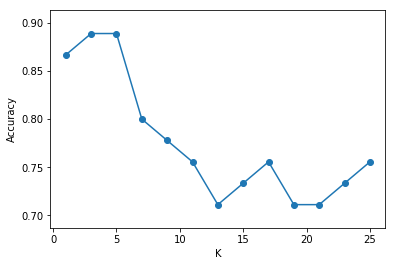

In [7]:
plt.scatter(kRecord, accRecord)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(kRecord, accRecord)
plt.show()

#### c. K Recommendation
The K that I would reccommend for this the data set is k = 1 because it gives the best accuracy rate when used to test against the test set of data

## 5. Statement of Collaboration

a. I worked with Kolby, Tucker, Matt and James on the by hand version of this function.

b. The resources I used was a series of websites that I no longer have record of and your github repository on it

## 6. Extra Credit

##### a. Cross-Validation

In [33]:
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
x = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [34]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

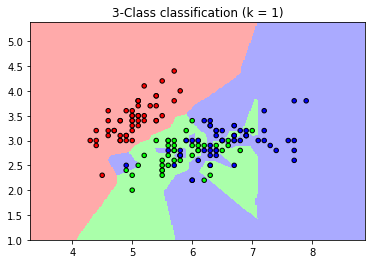

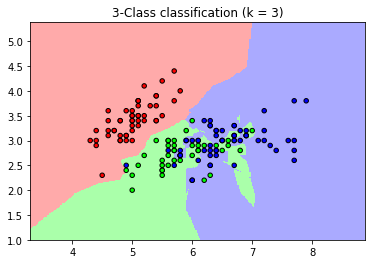

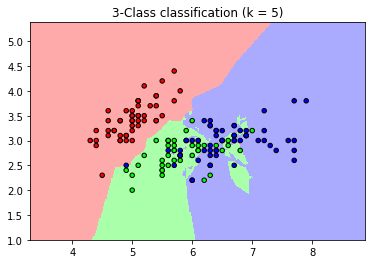

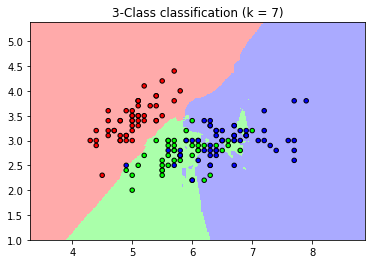

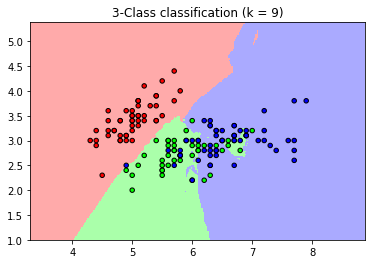

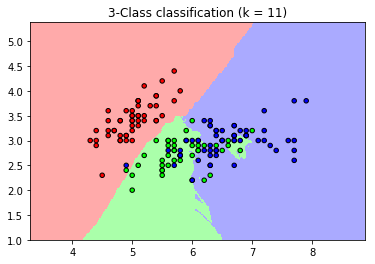

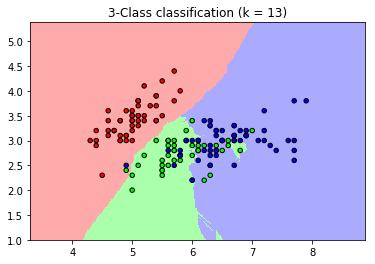

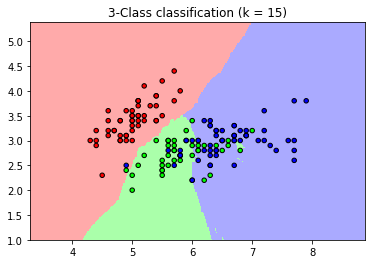

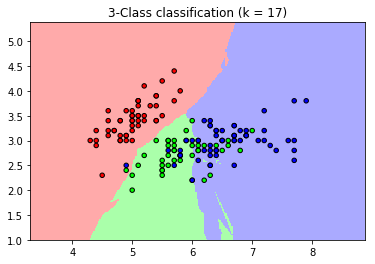

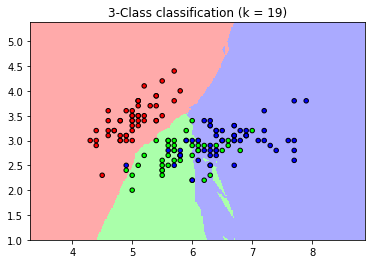

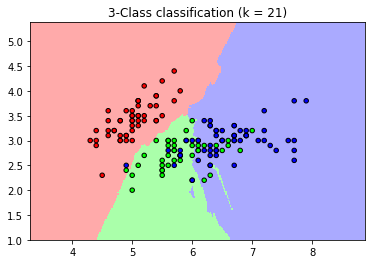

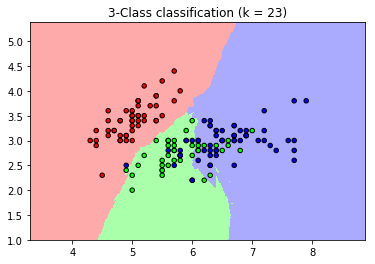

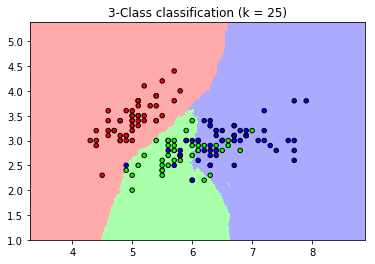

In [38]:

n_neighbors = 26
h = .02  # step size in the mesh

for k in range(1, n_neighbors,2):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (k))

plt.show()